# Raw cpu and gpu usage

Raw cpu and gpu usage over the last two years, by day, in
seconds, cumulative by year.  

In [57]:
import numpy as np
import json

# Load the JSON file
with open('bbolliet.json', 'r') as file:
    data = json.load(file)

In [171]:
# df['cpuh'] =  df['value']/3600
# tres

In [167]:
# df

,timestamp,value,cpuh
0,1656633600,7237664,7237664
1,1656720000,7237664,7237664
2,1656806400,7237664,7237664
3,1656892800,7237664,7237664
4,1656979200,7237664,7237664
...,...,...,...
705,1719446400,5049639741,5049639741
706,1719532800,5049639741,5049639741
707,1719619200,5049639741,5049639741
708,1719705600,5054648125,5054648125


## CPU

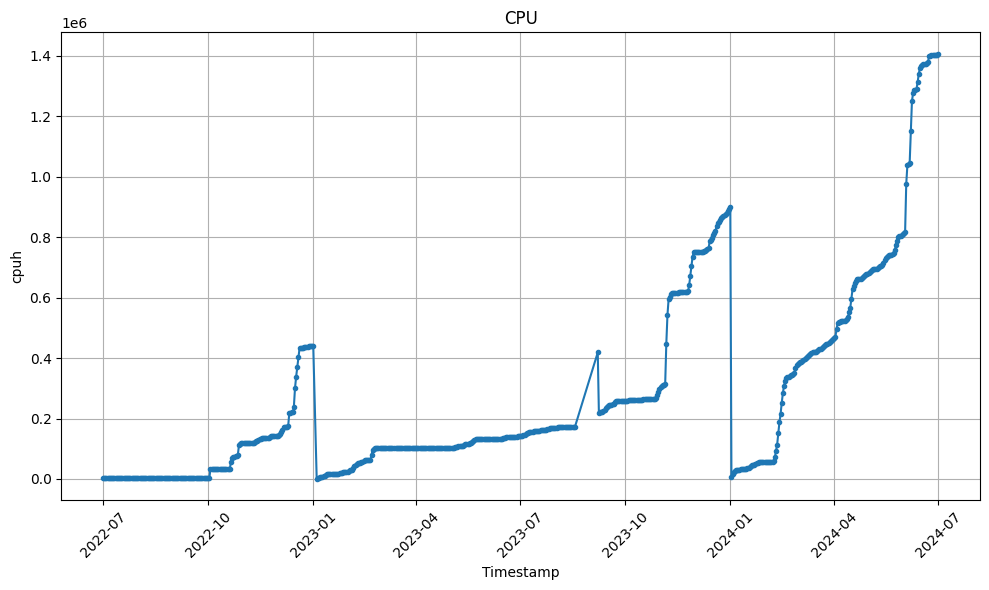

In [454]:
import pandas as pd
import matplotlib.pyplot as plt
# Convert to pandas DataFrame
tres = data[0]['values']
df = pd.DataFrame(tres, columns=['timestamp', 'value'])




# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Convert value to numeric
df['value'] = pd.to_numeric(df['value'])


df['cpuh'] =  df['value']/3600

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['cpuh'], marker='.')
plt.title('CPU')
plt.xlabel('Timestamp')
plt.ylabel('cpuh')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [455]:
df['cpuh']

0      2.010462e+03
1      2.010462e+03
2      2.010462e+03
3      2.010462e+03
4      2.010462e+03
           ...     
705    1.402678e+06
706    1.402678e+06
707    1.402678e+06
708    1.404069e+06
709    1.407141e+06
Name: cpuh, Length: 710, dtype: float64

In [457]:
df.iloc[400:416]

,timestamp,value,cpuh
400,2023-08-08,617491894,171525.526111
401,2023-08-09,617491894,171525.526111
402,2023-08-10,618068214,171685.615000
403,2023-08-11,618068214,171685.615000
404,2023-08-12,618068214,171685.615000
405,2023-08-13,618068214,171685.615000
406,2023-08-14,618068214,171685.615000
407,2023-08-15,618068214,171685.615000
408,2023-08-16,618068214,171685.615000
409,2023-08-17,618068214,171685.615000


In [458]:
df.iloc[411]

timestamp    2023-09-07 00:00:00
value                 1506339180
cpuh                   418427.55
Name: 411, dtype: object

In [459]:
df = df.drop(index=411)

In [460]:
df.iloc[400:416]

,timestamp,value,cpuh
400,2023-08-08,617491894,171525.526111
401,2023-08-09,617491894,171525.526111
402,2023-08-10,618068214,171685.615000
403,2023-08-11,618068214,171685.615000
404,2023-08-12,618068214,171685.615000
405,2023-08-13,618068214,171685.615000
406,2023-08-14,618068214,171685.615000
407,2023-08-15,618068214,171685.615000
408,2023-08-16,618068214,171685.615000
409,2023-08-17,618068214,171685.615000


In [461]:
dv = df['cpuh']

In [462]:
dv.loc[400:420]

400    171525.526111
401    171525.526111
402    171685.615000
403    171685.615000
404    171685.615000
405    171685.615000
406    171685.615000
407    171685.615000
408    171685.615000
409    171685.615000
410    172197.721667
412    216638.343889
413    220233.970556
414    222380.708333
415    222380.708333
416    223523.392778
417    229016.441667
418    234267.812778
419    237845.155000
420    240917.155000
Name: cpuh, dtype: float64

In [463]:
df.loc[412]

timestamp    2023-09-08 00:00:00
value                  779898038
cpuh               216638.343889
Name: 412, dtype: object

In [464]:

arr = np.where(dv.diff().dropna().values<0)[0]
print(arr)
# Create the list of tuples
tuples_list = [(0, arr[0]-1)] + [(arr[i], arr[i+1]-1) for i in range(len(arr)-1)] + [(arr[-1],dv.index[-1])]

# Display the result
print(tuples_list)




[184 526]
[(0, 183), (184, 525), (526, 709)]


In [465]:
sdf = []
for t in tuples_list:
    i = t[1]
    j = t[0]
    print(j,i)
    df_copy = dv.copy()
    df_copy.loc[(df_copy.index > i+1) | (df_copy.index <= j)] = 0
    sdf.append(df_copy)

0 183
184 525
526 709


In [466]:
df_copy

0      0.000000e+00
1      0.000000e+00
2      0.000000e+00
3      0.000000e+00
4      0.000000e+00
           ...     
705    1.402678e+06
706    1.402678e+06
707    1.402678e+06
708    1.404069e+06
709    1.407141e+06
Name: cpuh, Length: 709, dtype: float64

In [469]:
sdf[1].iloc[180:189]

180       0.000000
181       0.000000
182       0.000000
183       0.000000
184       0.000000
185     256.355556
186    1782.293333
187    2715.182222
188    5007.875556
Name: cpuh, dtype: float64

In [470]:
sdf[0].iloc[180:189]

180    438987.929444
181    438987.929444
182    438987.929444
183    438987.929444
184    438987.929444
185         0.000000
186         0.000000
187         0.000000
188         0.000000
Name: cpuh, dtype: float64

In [471]:
sdf_all = sdf[0].copy()

In [472]:
sdf_add = sdf[1].copy()


In [473]:
sdf_add = sdf_add.apply(lambda x: x+ sdf_all.iloc[184] if x != 0 else x)

In [474]:
sdf_add.iloc[180:189]

180         0.000000
181         0.000000
182         0.000000
183         0.000000
184         0.000000
185    439244.285000
186    440770.222778
187    441703.111667
188    443995.805000
Name: cpuh, dtype: float64

In [476]:
sdf_all.iloc[180:189]

180    438987.929444
181    438987.929444
182    438987.929444
183    438987.929444
184    438987.929444
185         0.000000
186         0.000000
187         0.000000
188         0.000000
Name: cpuh, dtype: float64

In [477]:
sdf_res = sdf_add + sdf_all

In [478]:
sdf_res

0         0.000000
1      2010.462222
2      2010.462222
3      2010.462222
4      2010.462222
          ...     
705       0.000000
706       0.000000
707       0.000000
708       0.000000
709       0.000000
Name: cpuh, Length: 709, dtype: float64

<AxesSubplot: >

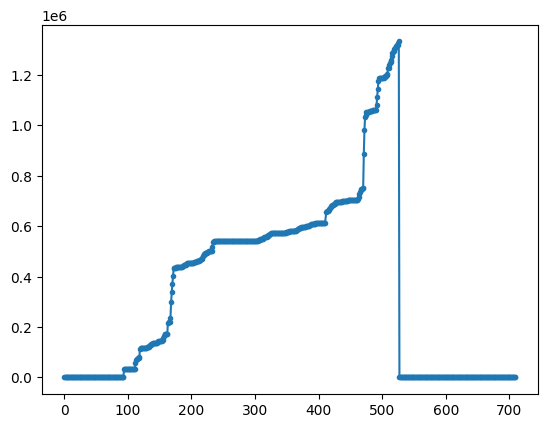

In [479]:
# diffvals = df['value'].diff().dropna()
sdf_res.plot(marker='.')




<AxesSubplot: >

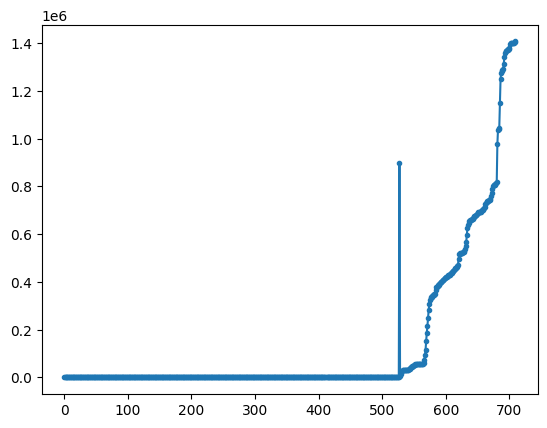

In [480]:
sdf[2].plot(marker='.')

In [481]:
sdf[2].iloc[520:530]

521         0.000000
522         0.000000
523         0.000000
524         0.000000
525         0.000000
526         0.000000
527    900019.011111
528      6646.008889
529     15490.062222
530     21634.062222
Name: cpuh, dtype: float64

In [482]:
sdf[2].loc[527] = 0

In [483]:
sdf_res.iloc[520:530]

521    1.308994e+06
522    1.312711e+06
523    1.316022e+06
524    1.318757e+06
525    1.324539e+06
526    1.331770e+06
527    0.000000e+00
528    0.000000e+00
529    0.000000e+00
530    0.000000e+00
Name: cpuh, dtype: float64

In [484]:
floor_val = sdf_res.loc[526]

In [485]:
sdf_add = sdf[2].copy()

In [486]:
sdf_add = sdf_add.apply(lambda x: x+ floor_val if x != 0 else x)

In [487]:
sdf_add.iloc[520:530]

521    0.000000e+00
522    0.000000e+00
523    0.000000e+00
524    0.000000e+00
525    0.000000e+00
526    0.000000e+00
527    0.000000e+00
528    1.338416e+06
529    1.347260e+06
530    1.353404e+06
Name: cpuh, dtype: float64

In [488]:
sdf_add.loc[527] = floor_val

In [489]:
sdf_add.iloc[520:530]

521    0.000000e+00
522    0.000000e+00
523    0.000000e+00
524    0.000000e+00
525    0.000000e+00
526    0.000000e+00
527    1.331770e+06
528    1.338416e+06
529    1.347260e+06
530    1.353404e+06
Name: cpuh, dtype: float64

In [490]:
sdf_res = sdf_res + sdf_add

<AxesSubplot: >

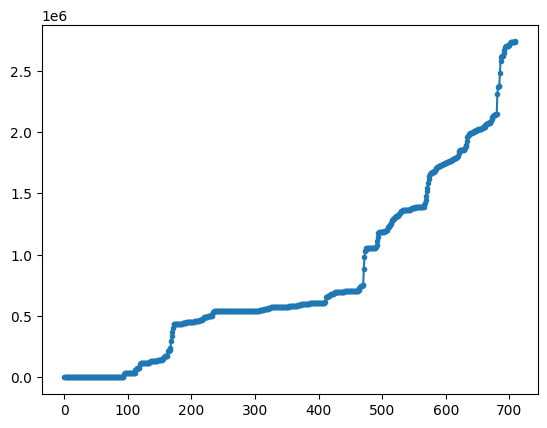

In [491]:
# diffvals = df['value'].diff().dropna()
sdf_res.plot(marker='.')




In [493]:
sdf_res

0      0.000000e+00
1      2.010462e+03
2      2.010462e+03
3      2.010462e+03
4      2.010462e+03
           ...     
705    2.734448e+06
706    2.734448e+06
707    2.734448e+06
708    2.735839e+06
709    2.738911e+06
Name: cpuh, Length: 709, dtype: float64

In [497]:
cumulative_cpuh = sdf_res.loc[709]

In [498]:
cumulative_cpuh

2738911.206388889

In [494]:
# Calculate the number of days
number_of_days = (df['timestamp'].max() - df['timestamp'].min()).days

# Output the result
print(f"Number of days: {number_of_days}")

Number of days: 731


In [500]:
cpuh_per_day = cumulative_cpuh/number_of_days

In [503]:
nyear = 3
cpuh_tot = nyear*365*cpuh_per_day
print("%.4f MCPUh"%(cpuh_tot/1e6))

4.1027 MCPUh


## GPU

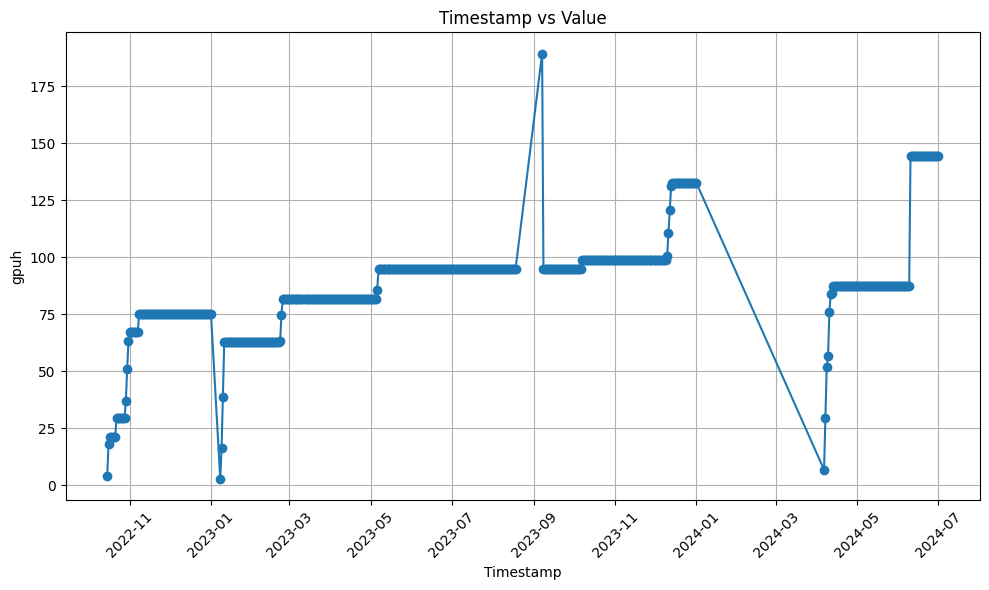

In [532]:
import pandas as pd
import matplotlib.pyplot as plt

tres = data[1]['values']
# Convert to pandas DataFrame
df = pd.DataFrame(tres, columns=['timestamp', 'value'])

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Convert value to numeric
df['value'] = pd.to_numeric(df['value'])

df['gpuh'] = df['value']/3600

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['gpuh'], marker='o')
plt.title('Timestamp vs Value')
plt.xlabel('Timestamp')
plt.ylabel('gpuh')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [533]:

# Example timestamp interval
start_time =  pd.to_datetime('2023-07-30')
end_time =  pd.to_datetime('2023-09-30')

# Ensure 'timestamp' column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filter the DataFrame based on the timestamp interval
filtered_df = df[(df['timestamp'] >= start_time) & (df['timestamp'] <= end_time)]

# Print the filtered DataFrame
print(filtered_df)

     timestamp   value        gpuh
281 2023-07-30  340946   94.707222
282 2023-07-31  340946   94.707222
283 2023-08-01  340946   94.707222
284 2023-08-02  340946   94.707222
285 2023-08-03  340946   94.707222
286 2023-08-04  340946   94.707222
287 2023-08-05  340946   94.707222
288 2023-08-06  340946   94.707222
289 2023-08-07  340946   94.707222
290 2023-08-08  340946   94.707222
291 2023-08-09  340946   94.707222
292 2023-08-10  340946   94.707222
293 2023-08-11  340946   94.707222
294 2023-08-12  340946   94.707222
295 2023-08-13  340946   94.707222
296 2023-08-14  340946   94.707222
297 2023-08-15  340946   94.707222
298 2023-08-16  340946   94.707222
299 2023-08-17  340946   94.707222
300 2023-08-18  340946   94.707222
301 2023-09-07  681892  189.414444
302 2023-09-08  340946   94.707222
303 2023-09-09  340946   94.707222
304 2023-09-10  340946   94.707222
305 2023-09-11  340946   94.707222
306 2023-09-12  340946   94.707222
307 2023-09-13  340946   94.707222
308 2023-09-14  3409

In [534]:
# problematic index
df.loc[301]

timestamp    2023-09-07 00:00:00
value                     681892
gpuh                  189.414444
Name: 301, dtype: object

In [535]:
# replace with next value
df.loc[301] = df.loc[300]

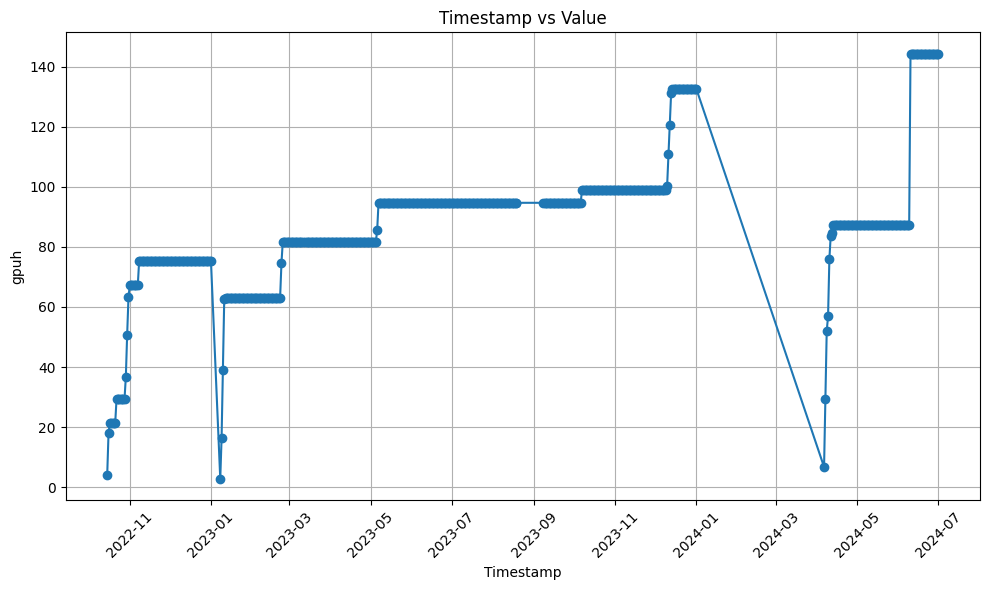

In [536]:


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['gpuh'], marker='o')
plt.title('Timestamp vs Value')
plt.xlabel('Timestamp')
plt.ylabel('gpuh')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [537]:
dv = df['gpuh']

In [538]:

arr = np.where(dv.diff().dropna().values<0)[0]
print(arr)
# Create the list of tuples
tuples_list = [(0, arr[0]-1)] + [(arr[i], arr[i+1]-1) for i in range(len(arr)-1)] + [(arr[-1],dv.index[-1])]

# Display the result
print(tuples_list)




[ 78 417]
[(0, 77), (78, 416), (417, 504)]


In [539]:
sdf = []
for t in tuples_list:
    i = t[1]
    j = t[0]
    print(j,i)
    df_copy = dv.copy()
    df_copy.loc[(df_copy.index > i+1) | (df_copy.index <= j)] = 0
    sdf.append(df_copy)

0 77
78 416
417 504


In [540]:
sdf[0].iloc[75:85]

75    75.311111
76    75.311111
77    75.311111
78    75.311111
79     0.000000
80     0.000000
81     0.000000
82     0.000000
83     0.000000
84     0.000000
Name: gpuh, dtype: float64

In [541]:
floor_val = sdf[0].loc[78]

In [542]:
sdf_add = sdf[1].copy()

In [543]:
sdf_add.iloc[75:85]

75     0.000000
76     0.000000
77     0.000000
78     0.000000
79     2.746944
80    16.476667
81    38.854722
82    62.821389
83    62.904167
84    62.904167
Name: gpuh, dtype: float64

In [544]:
sdf_add = sdf_add.apply(lambda x: x+ floor_val if x != 0 else x)

In [545]:
sdf_add = sdf_add + sdf[0]

<AxesSubplot: >

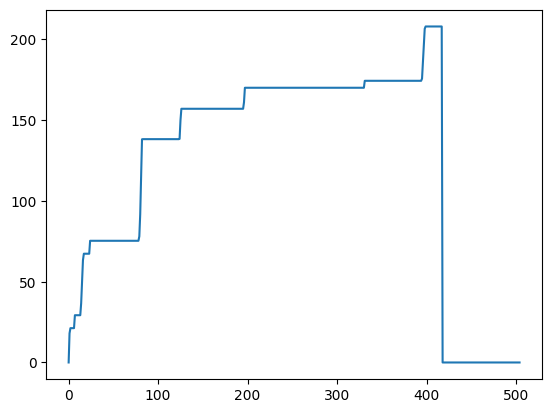

In [546]:
sdf_add.plot()

In [547]:
sdf_add.iloc[415:425]

415    207.946667
416    207.946667
417    207.946667
418      0.000000
419      0.000000
420      0.000000
421      0.000000
422      0.000000
423      0.000000
424      0.000000
Name: gpuh, dtype: float64

In [550]:
floor_val = sdf_add.loc[417]
floor_val

207.94666666666666

In [548]:
sdf[2].iloc[415:425]

415     0.000000
416     0.000000
417     0.000000
418     6.698889
419    29.429722
420    52.015000
421    56.849444
422    76.018611
423    83.792500
424    84.492778
Name: gpuh, dtype: float64

In [551]:
sdf[2] = sdf[2].apply(lambda x: x+ floor_val if x != 0 else x)

In [552]:
sdf[2].iloc[415:425]

415      0.000000
416      0.000000
417      0.000000
418    214.645556
419    237.376389
420    259.961667
421    264.796111
422    283.965278
423    291.739167
424    292.439444
Name: gpuh, dtype: float64

In [553]:
sdf_add = sdf_add + sdf[2]

<AxesSubplot: >

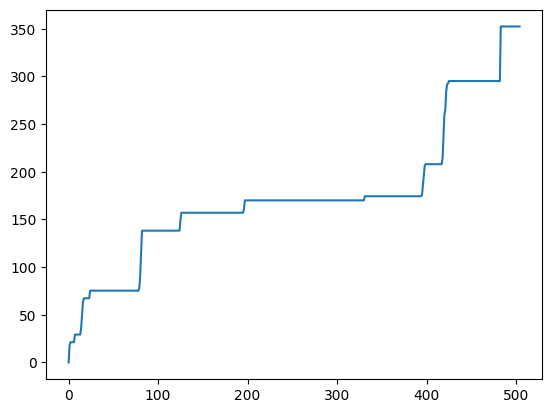

In [554]:
sdf_add.plot()

In [556]:
sdf_add.loc[424]

292.43944444444446

In [557]:
cumulative_gpuh = sdf_add.loc[424]

In [558]:
cumulative_gpuh

292.43944444444446

In [559]:
# Calculate the number of days
number_of_days = (df['timestamp'].max() - df['timestamp'].min()).days

# Output the result
print(f"Number of days: {number_of_days}")

Number of days: 625


In [561]:
gpuh_per_day = cumulative_gpuh/number_of_days

In [566]:
nyear = 3
gpuh_tot = nyear*365*gpuh_per_day
print("%.4f kGPUh"%(gpuh_tot/1e3))

0.5124 kGPUh


In [567]:
# multiply by 10 (as this work was done over a small fraction of Bolliet's time and expected to increase significantly over the next 3 years)
print("%.4f kGPUh"%(10*gpuh_tot/1e3))

5.1235 kGPUh
